In [1]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import yfinance as yf
from scipy.stats import gmean

# add utils path
src_path = os.path.abspath('../../')
if src_path not in sys.path:
    sys.path.append(src_path)

# import custom functions
from src.backtest import BacktestTrader
from src.strategies import EWMAC
from src.utils import get_risk_free_rate, plot_returns_distribution

In [2]:
START_DATE = '1999-01-21'
END_DATE = datetime.today().strftime('%Y-%m-%d')
TICKER = 'SPY'

SHORT_WINDOW = 16
LONG_WINDOW = 64

prices = yf.download(TICKER, start=START_DATE, end=END_DATE)['Adj Close']
risk_free_rate = get_risk_free_rate(START_DATE, END_DATE)

[*********************100%%**********************]  1 of 1 completed


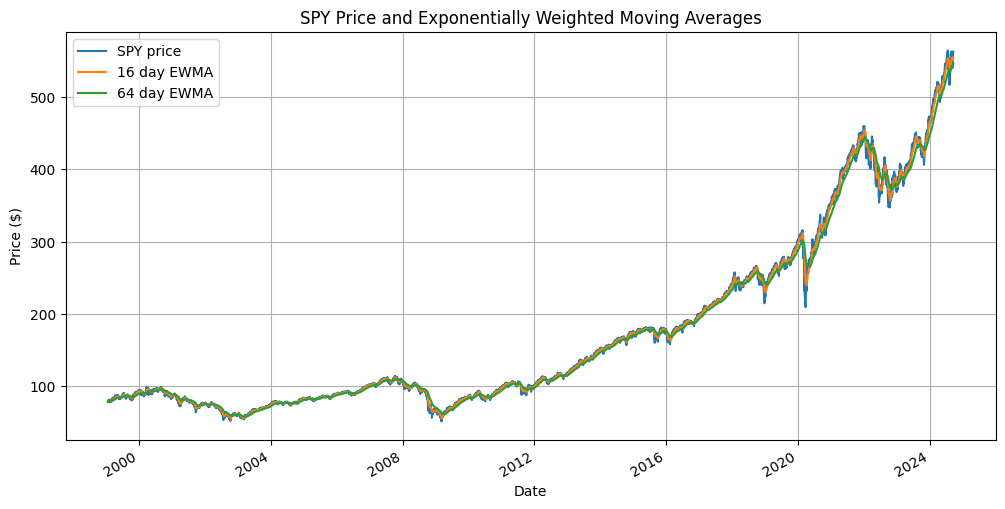

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(prices, label=f'{TICKER} price')
prices.ewm(span=SHORT_WINDOW).mean().plot(label=f'{SHORT_WINDOW} day EWMA')
prices.ewm(span=LONG_WINDOW).mean().plot(label=f'{LONG_WINDOW} day EWMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(f'{TICKER} Price and Exponentially Weighted Moving Averages')
plt.legend()
plt.grid()
plt.show()

In [4]:
stock_returns = prices.pct_change().dropna()
total_returns = (prices.iloc[-1]-prices.iloc[0])/prices.iloc[0]
average_returns = gmean(np.array(stock_returns)+1)-1
annual_returns = (1+average_returns)**252 - 1
annual_std = np.std(stock_returns) * np.sqrt(252)
sharpe_ratio = (annual_returns - risk_free_rate.mean()) / annual_std

stock_results = {
    'total_returns': total_returns,
    'average_returns': average_returns,
    'annual_returns': annual_returns,
    'annual_std': annual_std,
    'sharpe_ratio': sharpe_ratio
}

In [5]:
stock_results

{'total_returns': 6.222659763179842,
 'average_returns': 0.00030635571257620065,
 'annual_returns': 0.08024710555212011,
 'annual_std': 0.19394219233585897,
 'sharpe_ratio': 0.24099030497076432}

In [6]:
ewmac = EWMAC(short_window=SHORT_WINDOW, long_window=LONG_WINDOW)
ewmac_trader = BacktestTrader(ewmac, prices)
ewmac_trader.run_backtest()
ewmac_results = ewmac_trader.get_results(risk_free_rate)

In [7]:
ewmac_results

{'portfolio_value': 38856.94376754761,
 'total_returns': 2.8856943767547607,
 'average_returns': 0.0002102934796981426,
 'annual_returns': 0.05441739854182526,
 'annual_std': 0.11589155656844172,
 'sharpe_ratio': 0.1804141879402109}

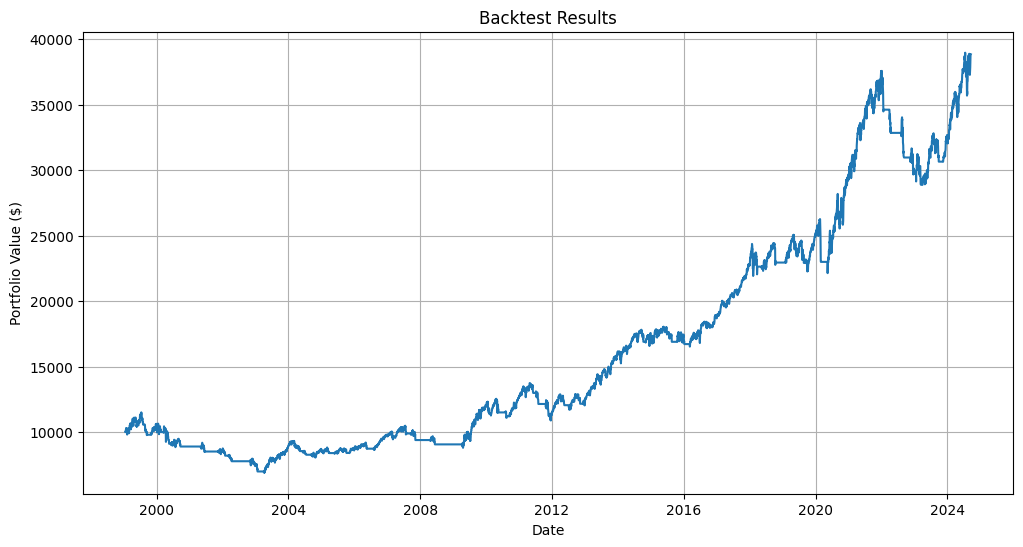

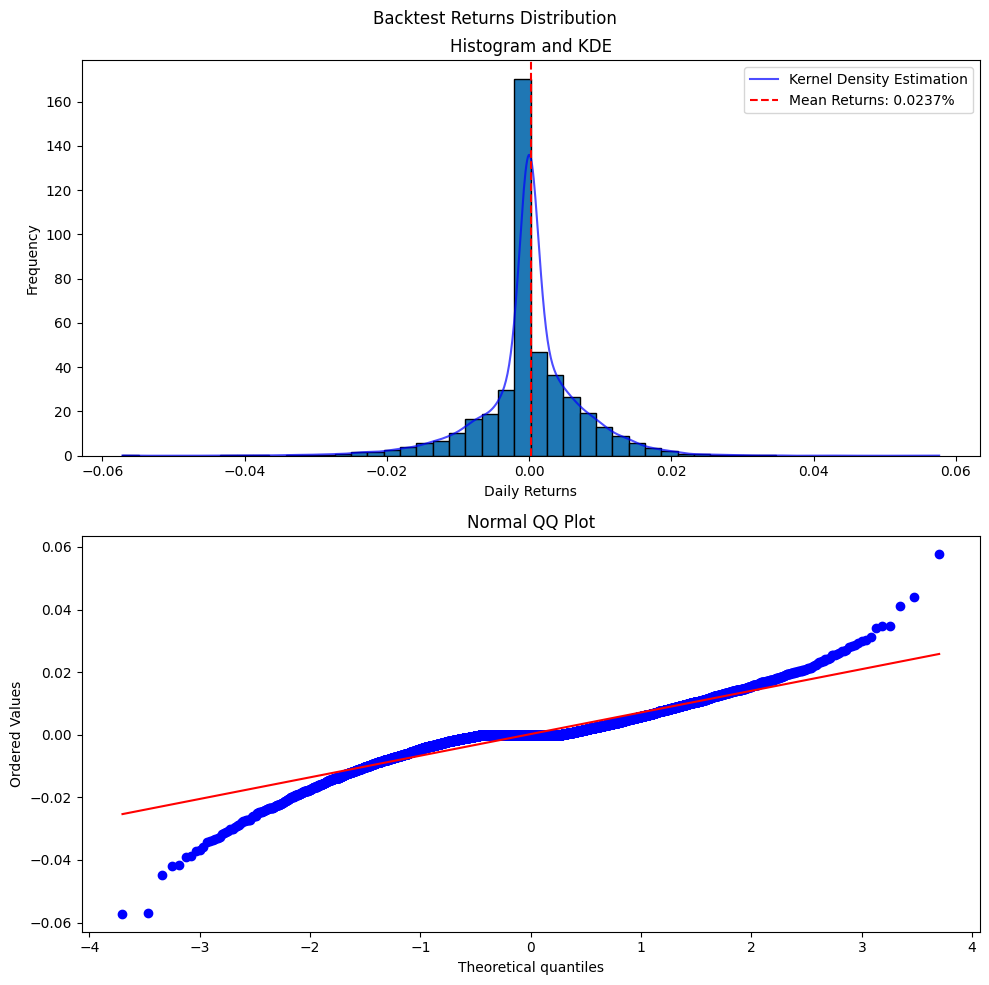

In [8]:
ewmac_trader.plot_results()
ewmac_trader.plot_analysis()

In [37]:
ewmac_short = EWMAC(short_window=SHORT_WINDOW, long_window=LONG_WINDOW, enable_shorting=True)
ewmac_short_trader = BacktestTrader(ewmac_short, prices)

ewmac_short_trader.run_backtest()
ewmac_short_results = ewmac_short_trader.get_results(risk_free_rate)

In [38]:
ewmac_short_results

{'portfolio_value': 15010.22421851112,
 'total_returns': 0.5010224218511121,
 'average_returns': 6.728962144642026e-05,
 'annual_returns': 0.01710099011289179,
 'annual_std': 0.16982897930100482,
 'sharpe_ratio': -0.08970668635471761}

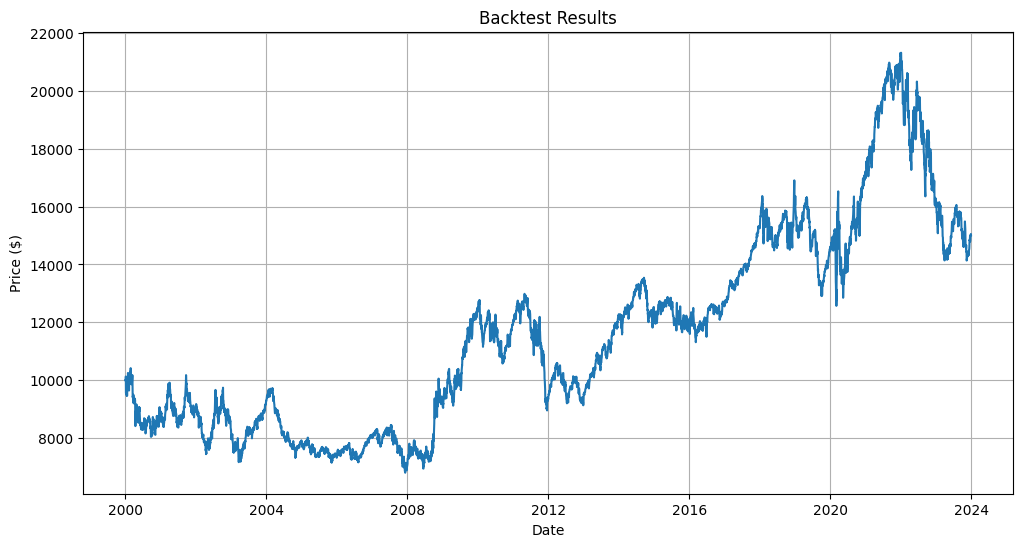

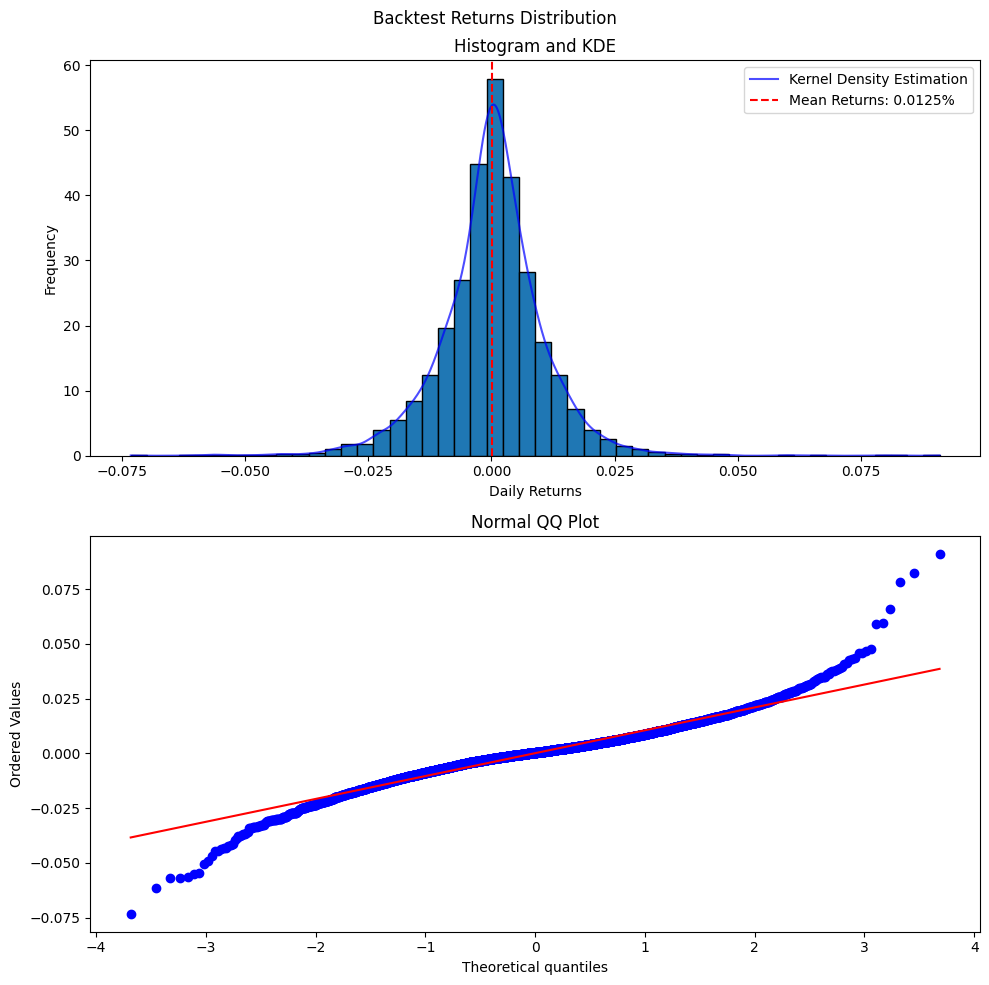

In [39]:
ewmac_short_trader.plot_results()
ewmac_short_trader.plot_analysis(hist_bins=50)